# Relax Inc. Challenge<a id='challenge'></a>

## Contents<a id='Contents'></a>
* [Relax Inc. Challenge](#challenge)
  * [Contents](#Contents)
  * [Introduction](#Introduction)
  * [Imports](#Imports)
  * [Load the Data](#Load_the_Data)
  * [Data Wrangling](#Data_Wrangling)
  * [Exploratory Data Analysis](#EDA)
  * [Summary](#Summary)

## Introduction<a id='Introduction'></a>

User product data has been provided in two separate CSV files. The first file, 'takehome_users', has identifying information and preferences for 12,000 users who signed up for the product in the last two years. The second file, 'takehome_user_engagement', has a row for each date that a user logged into the product.

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period, identify which factors predict future user adoption.

## Imports<a id='Imports'></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

## Load the Data<a id='Load_the_Data'></a>

In [72]:
users = pd.read_csv('C:/Users/jmhat/Desktop/Coding/RelaxINC_Challenge/Data/takehome_users.csv', encoding='ISO-8859-1')

In [73]:
engagement = pd.read_csv('C:/Users/jmhat/Desktop/Coding/RelaxINC_Challenge/Data/takehome_user_engagement.csv')

## Data Wrangling<a id='Data_Wrangling'></a>

In [74]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [75]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [76]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [77]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [78]:
engagement.visited.value_counts()

1    207917
Name: visited, dtype: int64

As part of the explanatory PDF file, object_id is the user's id which correlates with the user_id column of the engagement dataset. I now need to determine which users are 'adopted users', i.e., those who have logged into the proudct on three separate days in at least one seven-day period of time. We can also drop the 'visited' column from the engagement dataset since they are all '1'. To help with the analysis, I will also convert the time_stamp column in the engagement dataset to datetime.

In [79]:
engagement.drop('visited', axis=1, inplace=True)

In [80]:
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])

In [81]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.2 MB


In [82]:
engagement['user_id'].value_counts()

3623     606
906      600
1811     593
7590     590
8068     585
        ... 
4699       1
4698       1
4697       1
4696       1
12000      1
Name: user_id, Length: 8823, dtype: int64

It appears that the modifications were successfully implemented. There are also 8823 unique users in the engagement dataset, so this gives us a starting point to determine which ones logged on at least three times in one week.

In [83]:
engagement = engagement[engagement.groupby('user_id').user_id.transform('count') >= 3]

In [84]:
engagement['user_id'].value_counts()

3623     606
906      600
1811     593
7590     590
8068     585
        ... 
10429      3
5575       3
5577       3
5589       3
6045       3
Name: user_id, Length: 2248, dtype: int64

In [85]:
engagement.head()

,time_stamp,user_id
1,2013-11-15 03:45:04,2
2,2013-11-29 03:45:04,2
3,2013-12-09 03:45:04,2
4,2013-12-25 03:45:04,2
5,2013-12-31 03:45:04,2


In [86]:
engagement.isna().sum()

time_stamp    0
user_id       0
dtype: int64

In [87]:
engagement.time_stamp.count()

201002

In [88]:
engagement

,time_stamp,user_id
1,2013-11-15 03:45:04,2
2,2013-11-29 03:45:04,2
3,2013-12-09 03:45:04,2
4,2013-12-25 03:45:04,2
5,2013-12-31 03:45:04,2
...,...,...
207905,2014-04-20 14:22:45,11991
207906,2014-04-25 14:22:45,11991
207907,2014-04-28 14:22:45,11991
207908,2014-05-17 14:22:45,11991


I now have just the rows of users who have logged in at least 3 times at all. I now need to filter this down further to find those who logged in three times in one week.The columns are now arranged in ascending order for both time stamp and user ID.

In [89]:
#Create a timedelta of 7 days
timedelta = pd.Timedelta(7, unit='d')

In [90]:
#Create a function that takes every value and then subtracts the timedelta and sums how many days are within 7 days of the date.
func = lambda x: x.apply(lambda y: (x.between(y - timedelta, y).sum()))
engagement['Visits_per_Week'] = engagement.groupby('user_id')['time_stamp'].apply(func)

In [91]:
engagement

,time_stamp,user_id,Visits_per_Week
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,2
...,...,...,...
207905,2014-04-20 14:22:45,11991,1
207906,2014-04-25 14:22:45,11991,2
207907,2014-04-28 14:22:45,11991,2
207908,2014-05-17 14:22:45,11991,1


In [92]:
Visits = engagement.loc[engagement['Visits_per_Week'] >= 3]

In [93]:
Visits

,time_stamp,user_id,Visits_per_Week
9,2014-02-09 03:45:04,2,3
10,2014-02-13 03:45:04,2,3
11,2014-02-16 03:45:04,2,3
24,2013-02-06 22:08:03,10,3
27,2013-02-19 22:08:03,10,3
...,...,...,...
207898,2014-05-23 11:04:47,11988,6
207899,2014-05-24 11:04:47,11988,7
207900,2014-05-26 11:04:47,11988,6
207901,2014-05-27 11:04:47,11988,6


In [94]:
adopted_users = list(Visits['user_id'].unique())

Now that we have a list of every user ID where the user logged in at least 3 times in one week, we can add another column to the users DataFrame indicating which users are adopted and which ones are not. We'll then look into which features correlate with adopted user rates.

In [95]:
all_users = list(users['object_id'])

In [96]:
adopted = []

In [97]:
for i in all_users:
    if i in adopted_users:
        adopted.append(1)
    else:
        adopted.append(0)

In [98]:
users['adopted'] = adopted

In [99]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [100]:
users['creation_time'] = users['creation_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [101]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [102]:
#Replace categorical variables with get_dummies method
users_numeric= users.copy()

#Drop unused columns
users_numeric.drop(['name', 'email'], axis=1, inplace=True)

In [103]:
users_numeric

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0
...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0
11996,11997,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0
11997,11998,2014-04-27 12:45:16,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0
11998,11999,2012-05-31 11:55:59,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0


In [104]:
users_numeric = pd.get_dummies(users_numeric, columns=['creation_source'], drop_first=False)

In [105]:
users_numeric

,object_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,1.398139e+09,1,0,11,10803.0,0,1,0,0,0,0
1,2,2013-11-15 03:45:04,1.396238e+09,0,0,1,316.0,1,0,1,0,0,0
2,3,2013-03-19 23:14:52,1.363735e+09,0,0,94,1525.0,0,0,1,0,0,0
3,4,2013-05-21 08:09:28,1.369210e+09,0,0,1,5151.0,0,1,0,0,0,0
4,5,2013-01-17 10:14:20,1.358850e+09,0,0,193,5240.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,1.378448e+09,0,0,89,8263.0,0,0,1,0,0,0
11996,11997,2013-01-10 18:28:37,1.358275e+09,0,0,200,NaN,0,0,0,0,0,1
11997,11998,2014-04-27 12:45:16,1.398603e+09,1,1,83,8074.0,0,1,0,0,0,0
11998,11999,2012-05-31 11:55:59,1.338638e+09,0,0,6,NaN,0,0,0,1,0,0


In [107]:
users_numeric['c_year'] = users_numeric['creation_time'].dt.year

In [109]:
users_numeric['c_month'] = users_numeric['creation_time'].dt.month

In [110]:
users_numeric['c_day'] = users_numeric['creation_time'].dt.day

In [111]:
users_numeric['c_hour'] = users_numeric['creation_time'].dt.hour

In [112]:
users_numeric['c_minute'] = users_numeric['creation_time'].dt.minute

In [113]:
users_numeric['c_second'] = users_numeric['creation_time'].dt.second

In [115]:
users_numeric.drop(['creation_time'], axis=1, inplace=True)

In [116]:
users_numeric

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,c_year,c_month,c_day,c_hour,c_minute,c_second
0,1,1.398139e+09,1,0,11,10803.0,0,1,0,0,0,0,2014,4,22,3,53,30
1,2,1.396238e+09,0,0,1,316.0,1,0,1,0,0,0,2013,11,15,3,45,4
2,3,1.363735e+09,0,0,94,1525.0,0,0,1,0,0,0,2013,3,19,23,14,52
3,4,1.369210e+09,0,0,1,5151.0,0,1,0,0,0,0,2013,5,21,8,9,28
4,5,1.358850e+09,0,0,193,5240.0,0,1,0,0,0,0,2013,1,17,10,14,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,1.378448e+09,0,0,89,8263.0,0,0,1,0,0,0,2013,9,6,6,14,15
11996,11997,1.358275e+09,0,0,200,NaN,0,0,0,0,0,1,2013,1,10,18,28,37
11997,11998,1.398603e+09,1,1,83,8074.0,0,1,0,0,0,0,2014,4,27,12,45,16
11998,11999,1.338638e+09,0,0,6,NaN,0,0,0,1,0,0,2012,5,31,11,55,59


## Exploratory Data Analysis<a id='EDA'></a>

Now that the data is sorted correctly for exploratory data analysis, we will look at possible trends between the different features and how users become adopted or not.

Text(0, 0.5, 'Total Amount')

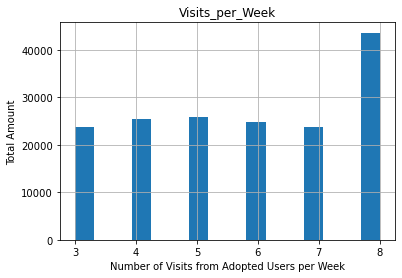

In [130]:
#Plot the number of visit occurances for adopted users.
Visits.hist(column='Visits_per_Week', bins=16)
plt.xlabel('Number of Visits from Adopted Users per Week')
plt.ylabel("Total Amount")

array([[<AxesSubplot:title={'center':'object_id'}>,
        <AxesSubplot:title={'center':'last_session_creation_time'}>,
        <AxesSubplot:title={'center':'opted_in_to_mailing_list'}>,
        <AxesSubplot:title={'center':'enabled_for_marketing_drip'}>],
       [<AxesSubplot:title={'center':'org_id'}>,
        <AxesSubplot:title={'center':'invited_by_user_id'}>,
        <AxesSubplot:title={'center':'adopted'}>,
        <AxesSubplot:title={'center':'creation_source_GUEST_INVITE'}>],
       [<AxesSubplot:title={'center':'creation_source_ORG_INVITE'}>,
        <AxesSubplot:title={'center':'creation_source_PERSONAL_PROJECTS'}>,
        <AxesSubplot:title={'center':'creation_source_SIGNUP'}>,
        <AxesSubplot:title={'center':'creation_source_SIGNUP_GOOGLE_AUTH'}>],
       [<AxesSubplot:title={'center':'c_year'}>,
        <AxesSubplot:title={'center':'c_month'}>,
        <AxesSubplot:title={'center':'c_day'}>,
        <AxesSubplot:title={'center':'c_hour'}>],
       [<AxesSubplot:titl

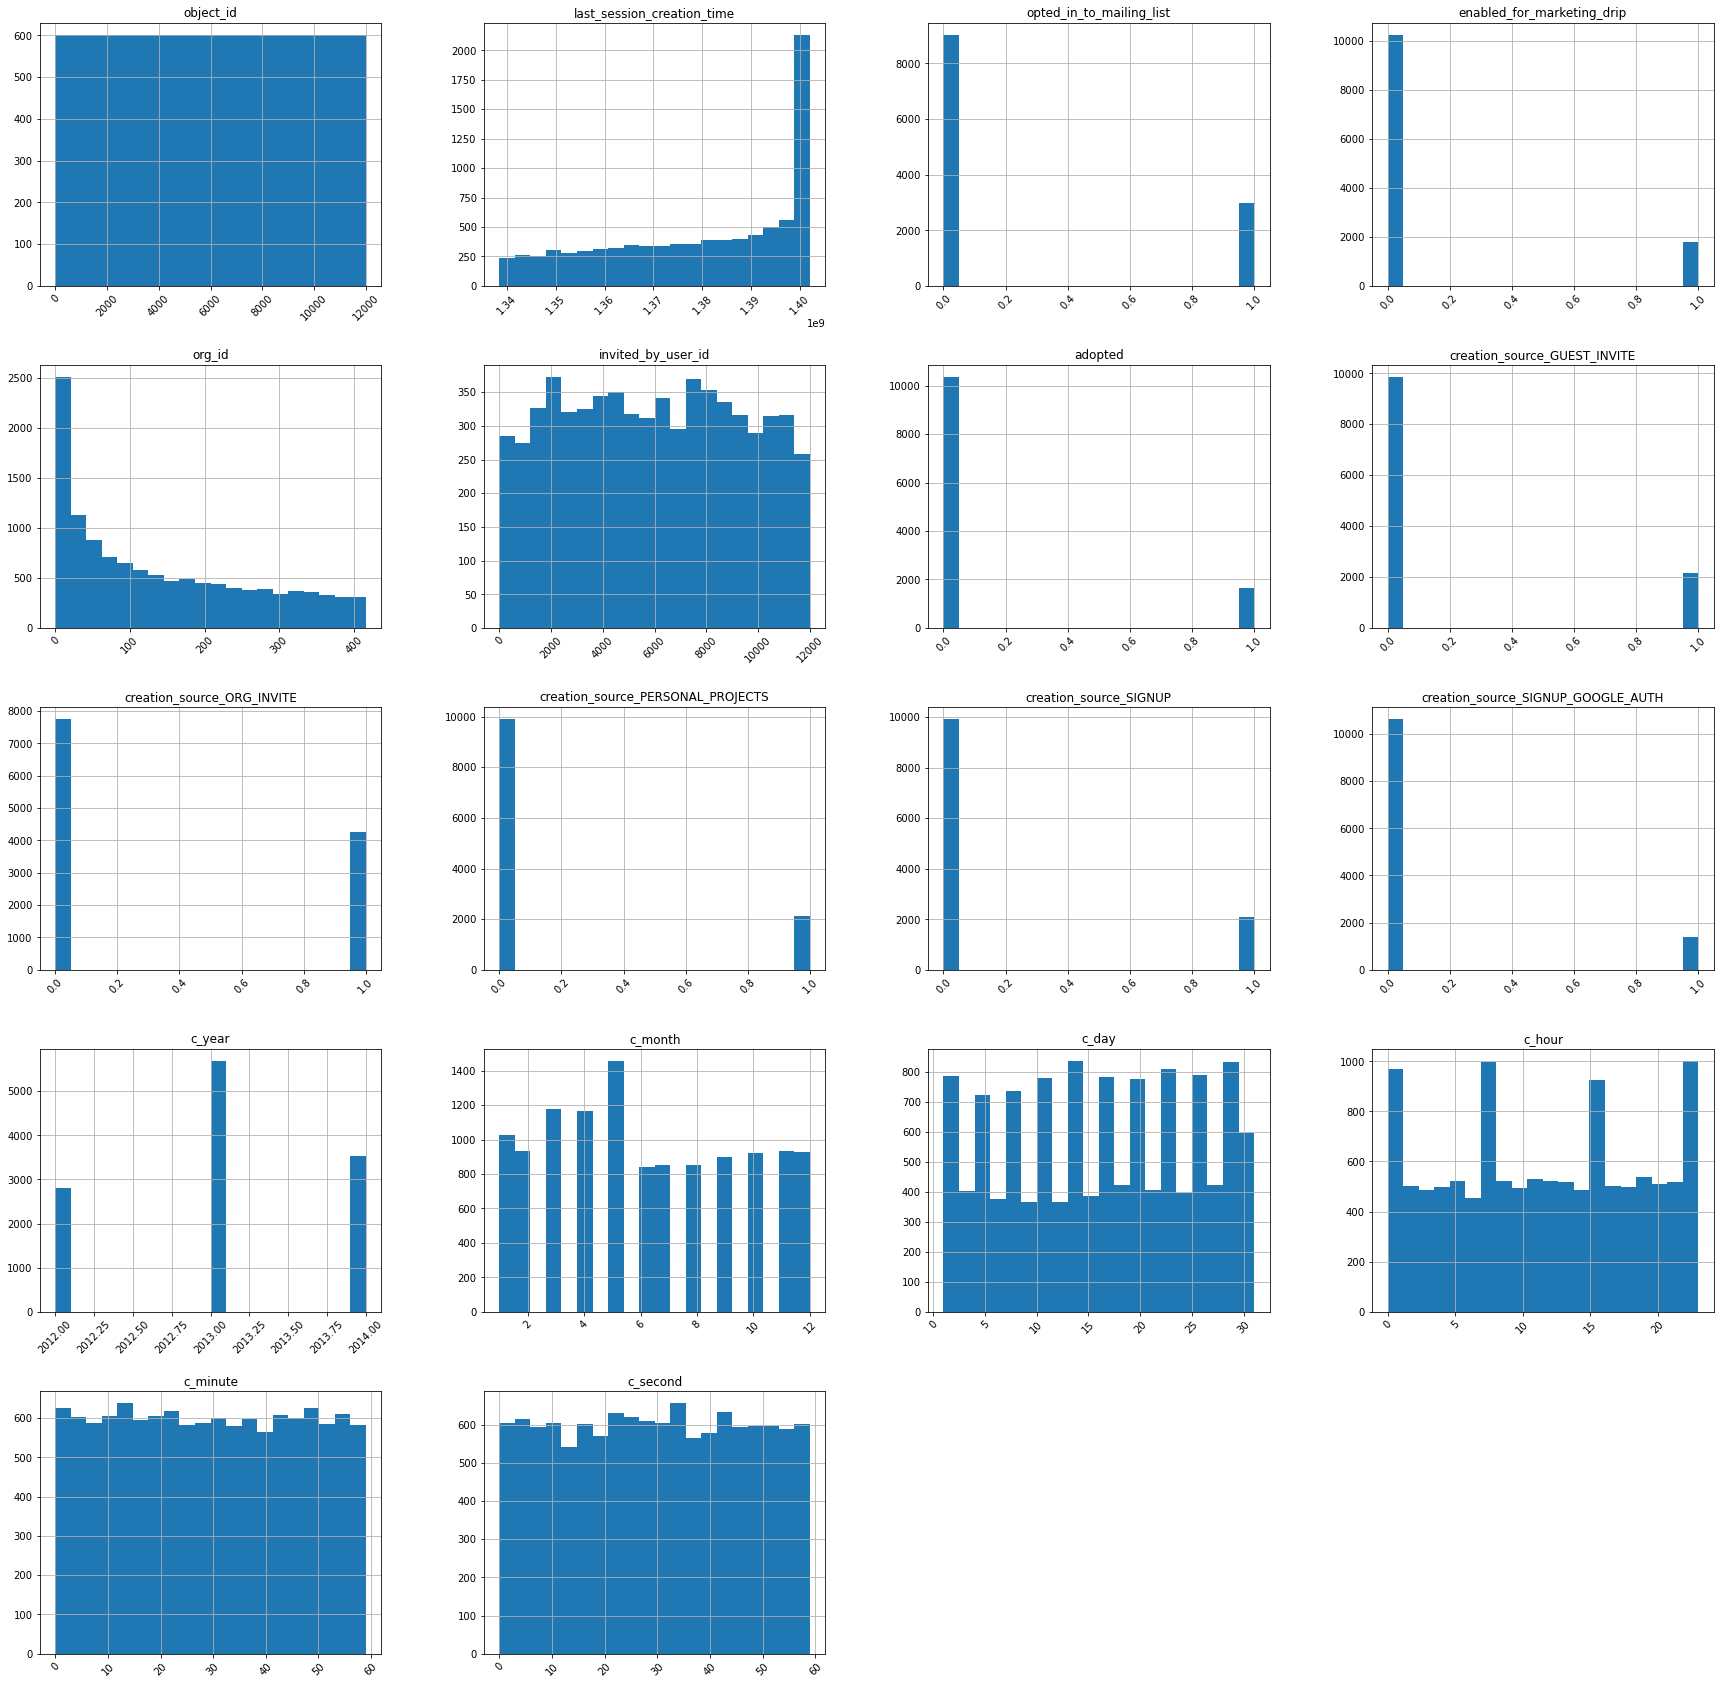

In [131]:
#Plot histograms of each value in the users_numeric dataframe.
users_numeric.hist(bins=20, figsize=(30,30), xrot=45)

Correlation between continuous features


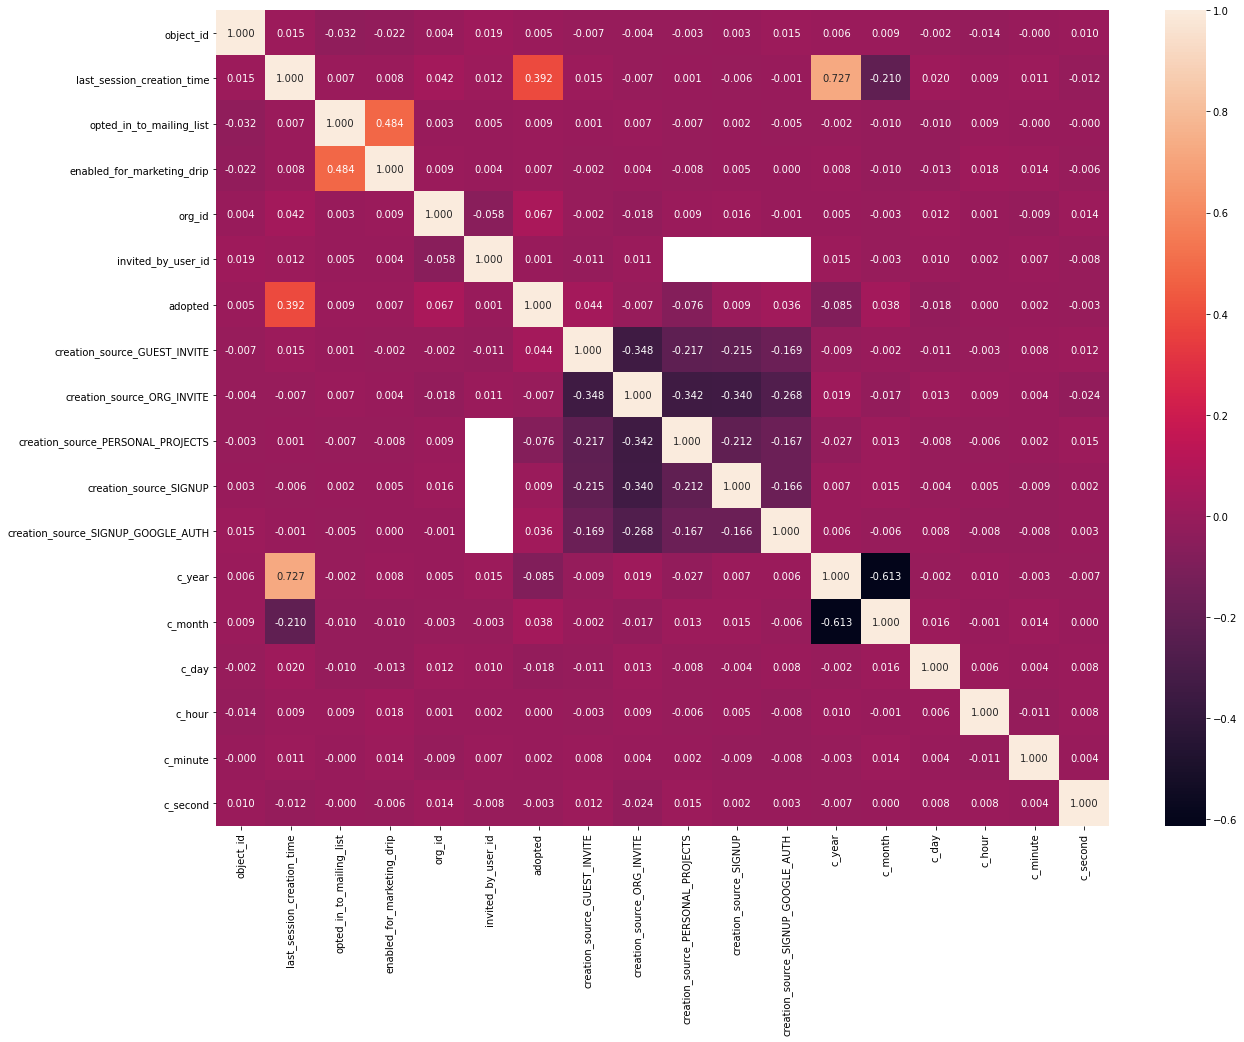

In [117]:
#Plot correlation matrix
plt.figure(figsize=(20,15))
print('Correlation between continuous features')
p=sns.heatmap(users_numeric.corr(), annot=True, fmt='.3f')

## Summary<a id='Summary'></a>

From the correlation matrix, it appears that the only value that is moderately correlated with whether a user becomes adopted is the last session creation time, with a correlation of 0.392. The next largest positive correlation was organization ID, with a value of 0.067. There are also negative correlations with whether the makes an account for personal projects and the year. Another obvious correlation with whether a user becomes adopted is the amount of times they log into the software. 